# Making plots look like done with ROOT using matplotlib
The `cmsplot` module in geeksw is a slightly modified `matplotlib.pyplot` and can be used as a drop-in replacement to make your matplotlib plots look like ROOT.

In [1]:
import geeksw.plotting.cmsplot as plt
from geeksw.plotting.root_colors import *
import numpy as np
import uproot

In this example, we try to reproduce the plot from the [CMS style guidelines](https://twiki.cern.ch/twiki/bin/view/CMS/Internal/FigGuidelines). The ROOT file with the histogram data from this page is provided in `examples/data`:

In [2]:
f = uproot.open("data/histo.root")

Load the bin contents for data and simulation:

In [3]:
data = f["data"]
MC = f["MC"]
edges = data.edges
bin_centers = (edges[1:] + edges[:-1])/2.
data = data.values
MC = MC.values

According to the style guidelines, the Helvetica font has to be used for plots. This is particularly important for the CMS logo. Since Helvetica is a proprietary font, it does not come with geeksw and if you use a GNU/Linux distribution it might not be available to you.

What worked for me was to ask a Mac user colleague if he could pass me the Helvetica `dfont` or `ttc` file from his system, and I converted it to `ttf` files with [this online tool](https://transfonter.org/ttc-unpack). Then I placed the `ttf` files in my user directory under `~/.local/share/fonts`.

The last step was to rebuild the matplotlib font cache:

In [4]:
plt.matplotlib.font_manager._rebuild()

This worked for me both on Arch Linux and Scientific Linux 7.

When you create a new figure, always call `plt.figure()` in the beginning to make sure the figures size is set to something which in conjunction with the font sized looks like a ROOT plot in a CMS paper.

Note that `cmsplot` porvides the additional functions `cmstext` and `lumitext`, which can be used to draw the iconic CMS labels and the top right label with the luminosity and energy information.

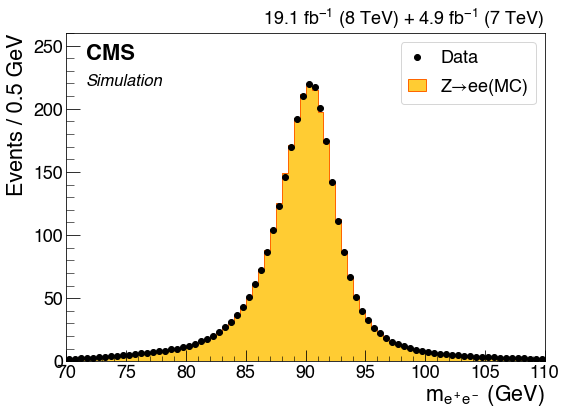

In [5]:
plt.figure()
plt.scatter(bin_centers, data, color="k", zorder=100, label="Data")
plt.fill_between(edges[:-1], MC, step="post", facecolor=kOrange-2, edgecolor=kOrange+7,label=r"$Z\to ee$(MC)")
plt.xlabel(r"$m_{e^+e^-}$ (GeV)")
plt.ylabel("Events / 0.5 GeV")
plt.xlim(70,110)
plt.ylim(0,260)
plt.cmstext("CMS Simulation")
plt.lumitext("19.1 $fb^{-1}$ (8 TeV) + 4.9 $fb^{-1}$ (7 TeV)")
plt.legend(loc="upper right")
plt.show()